# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Homework 4:  Logistic Regression and PCA

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import zipfile


import seaborn as sns
sns.set()

# if you want to do a 2-sample t-test:
from scipy.stats import ttest_ind

<div class='theme'> Cancer Classification from Gene Expressions </div>

In this problem, we will build a classification model to distinguish between two related classes of cancer, acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML), using gene expression measurements. The dataset is provided in the file `data/genomic_data.csv`. Each row in this file corresponds to a tumor tissue sample from a patient with one of the two forms of Leukemia. The first column contains the cancer type, with **0 indicating the ALL** class and **1 indicating the AML** class. Columns 2-7130 contain expression levels of 7129 genes recorded from each tissue sample. 

In the following questions, we will use linear and logistic regression to build classification models for this data set. 


<div class='exercise'><b> Question 1 [15 pts]: Data Exploration </b></div>

The first step is to split the observations into an approximate 75-25 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. `Cancer_type` is our target column.


**1.1** Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values**. Normalizing genomic data is a fairly standard first step.


**1.2** The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.


**1.3** Determine which single gene individually discriminates between the two cancer classes the best (consider every gene in the dataset) and call it `best_predictor`.

Plot two histograms of your `best_predictor` -- one using the training set and another using the testing set. The histogram should clearly distinguish two different `Cancer_type` classes.

**Hint:** You may use any reasonable approach to determine the `best_predictor`, but please use something very simple (whether taught in this class or elsewhere).


**1.4** Using `best_predictor`, create a classification model by simply eye-balling a value for this gene that would discriminate the two classes the best (do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection). Justify your choice in 1-2 sentences. Report the accuracy of your hand-chosen model on the test set.

<hr> 


### Answers

**The first step is to split the observations into an approximate 75-25 train-test split. Below is some code to do this for you (we want to make sure everyone has the same splits). Print dataset shape before splitting and after splitting. `Cancer_type` is our target column.**

In [3]:
np.random.seed(10)
df = pd.read_csv('data/genomic_data.csv', index_col=0)
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Cancer_type'], 
                                                         df.Cancer_type, test_size=0.25, 
                                                         random_state = 109, 
                                                         stratify = df.Cancer_type)

In [4]:
print('shape of full set:', df.shape)
print('shape of x_train:', X_train.shape,'\nshape of x_test:',X_test.shape,'\nshape of y_train:', y_train.shape,'\nshape of y_test:', y_test.shape)
print('value count of dataset: \n', df.Cancer_type.value_counts(normalize=True))

shape of full set: (752, 7130)
shape of x_train: (564, 7129) 
shape of x_test: (188, 7129) 
shape of y_train: (564,) 
shape of y_test: (188,)
value count of dataset: 
 0.0    0.511968
1.0    0.488032
Name: Cancer_type, dtype: float64


**1.1 Take a peek at your training set: you should notice the severe differences in the measurements from one gene to the next (some are negative, some hover around zero, and some are well into the thousands). To account for these differences in scale and variability, normalize each predictor to vary between 0 and 1. **NOTE: for the entirety of this homework assignment, you will use these normalized values, not the original, raw values.**


In [17]:
# X_train.describe()

In [18]:
# X_test

In [27]:
# df.head()

In [29]:
X_testNorm

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
730,0.551231,0.491834,0.446073,0.683776,0.582740,0.706226,0.600837,0.279027,0.795057,0.139594,...,0.459868,0.475715,0.690460,0.339711,0.138097,0.583479,0.334816,0.000000,0.380770,0.752379
405,0.416298,0.582563,0.438845,0.395964,0.580600,0.774472,0.328722,0.419572,0.372083,0.561972,...,0.660277,0.655070,0.231898,0.194729,0.708641,0.537605,0.433375,0.550658,0.301676,0.467305
146,0.269916,0.688088,0.376977,0.490495,0.619277,0.625425,0.623749,0.775985,0.515638,0.201543,...,0.557309,0.244917,0.428507,0.259558,0.553007,0.338148,0.562251,0.232694,0.470838,0.483762
130,0.000000,0.578855,0.400594,0.872766,0.205733,0.374758,0.394855,0.670381,0.492747,0.183372,...,0.666246,0.597685,0.553157,0.330940,0.692364,0.667400,1.000000,0.376459,0.309709,0.158615
620,0.180012,0.536142,0.144838,0.343449,0.411867,0.314464,0.968593,0.420012,0.476040,0.318838,...,0.365856,0.656925,0.138411,0.286228,0.556621,0.780834,0.721513,0.522074,0.421493,0.342380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0.102031,0.738981,0.597432,0.374311,0.461244,0.430339,0.604786,0.577060,0.627416,0.347594,...,0.814914,0.966929,0.818381,0.293913,0.867871,0.818321,0.548880,0.680098,0.521110,0.431207
393,0.574094,0.818686,0.368954,0.393693,0.510911,0.592302,0.731582,0.268844,0.327339,0.465086,...,0.666029,0.243248,0.353895,0.110635,0.895056,0.517048,0.465522,0.312341,0.406788,0.324980
417,0.353467,0.663533,0.668569,0.615557,0.627144,0.144345,0.582416,0.243039,0.529310,0.126011,...,0.509497,0.274163,0.188150,0.298216,0.438359,0.605212,0.398731,0.592874,0.460222,0.504823
109,0.564385,0.818292,0.427021,0.712689,0.552737,0.242634,0.456397,0.437528,0.506769,0.645919,...,0.403056,0.663272,0.526994,0.211653,0.499265,0.722499,0.568509,0.474708,0.697113,0.489629


In [33]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
# scaler = scaler.fit(X_train)
dfNorm = scaler.fit_transform(df)
dfNorm = pd.DataFrame(dfNorm, columns = df.columns, index = df.index)
X_trainNorm = scaler.fit_transform(X_train)
X_trainNorm = pd.DataFrame(X_trainNorm, columns = X_train.columns, index = X_train.index)
X_testNorm = scaler.fit_transform(X_test)
X_testNorm = pd.DataFrame(X_testNorm, columns = X_test.columns, index = X_test.index)
dfNorm

,Cancer_type,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,0.0,0.482348,0.636828,0.421504,0.354724,0.541964,0.313961,0.656215,0.557102,0.751598,...,0.577873,0.430681,0.346731,0.386057,0.611047,0.499519,0.370208,0.549853,0.470914,0.434172
1,0.0,0.538320,0.663173,0.653266,0.302249,0.463755,0.298072,0.644340,0.479530,0.602312,...,0.624184,0.522397,0.715986,0.349330,0.498395,0.471359,0.310147,0.387588,0.460523,0.317450
2,0.0,0.558867,0.655742,0.408589,0.409961,0.582961,0.475211,0.599733,0.611503,0.617755,...,0.553454,0.469745,0.542662,0.405702,0.628022,0.407405,0.364542,0.508344,0.449332,0.460110
3,0.0,0.582957,0.642908,0.633893,0.331939,0.476370,0.318081,0.636519,0.554080,0.658937,...,0.447358,0.517868,0.289674,0.345401,0.640367,0.558384,0.428003,0.500796,0.499371,0.423364
4,0.0,0.341354,0.564548,0.468144,0.292583,0.386808,0.177429,0.518919,0.267971,0.617755,...,0.665444,0.464084,0.388716,0.371196,0.703637,0.670006,0.414405,0.593250,0.565236,0.557378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.0,0.696528,0.584498,0.379790,0.437056,0.422404,0.294715,0.631741,0.330545,0.747420,...,0.560462,0.651464,0.435819,0.311584,0.508865,0.516085,0.323915,0.654308,0.857588,0.324064
748,1.0,0.640335,0.709007,0.145601,0.640275,0.543410,0.819101,0.498926,0.753030,0.840198,...,0.793460,0.295969,0.402568,0.676392,0.560715,0.575147,0.336958,0.699631,0.752875,0.557553
749,1.0,0.519750,0.459566,0.198037,0.314083,0.582719,0.369624,0.658192,0.444315,1.000000,...,0.506640,0.212257,0.585057,0.331757,0.773867,0.800121,0.176060,0.352877,0.379286,0.726550
750,0.0,0.622598,0.732820,0.621132,0.303219,0.065618,0.375281,0.557282,0.373386,0.490326,...,0.559916,0.536638,0.238878,0.297934,0.806955,0.564062,0.510765,0.436667,0.348156,0.405826


**1.2 The training set contains more predictors than observations. What problem(s) can this lead to in fitting a classification model to such a dataset? Explain in 3 or fewer sentences.**

#### Answer 1.2.:
When p > n we obtain perfect collinearity of the predictor set, and our model is susceptible to overfitting. 
Other problems that can arise with high dimentionality are that matrices may not be invertible (issue in OLS).


**1.3 Determine which single gene individually discriminates between the two cancer classes the best (consider every gene in the dataset) and call it `best_predictor`.**

**Plot two histograms of your `best_predictor` -- one using the training set and another using the testing set. The histogram should clearly distinguish two different `Cancer_type` classes.**

In [152]:
#scribbles - delete
X_trainNorm.shape
logit1 = LogisticRegression(penalty="none", fit_intercept=True).fit(X_trainNorm.iloc[:,2].values.reshape(-1,1), y_train)
sk.metrics.r2_score(y_test, logit1.predict(X_testNorm.iloc[:,2].values.reshape(-1,1)))
# logit1.predict(X_testNorm.iloc[:,2].values.reshape(-1,1))
# y_test

-0.9583333333333333

In [288]:
# Calculating highest R2 from using single predictor log regression on each gene.

logit1 = LogisticRegression(penalty="none", fit_intercept=True).fit(X_trainNorm, y_train)
highestBeta = np.argmin(logit1.coef_) #dette er høyeste beta
# len(logit1.coef_[0])
# highestBeta
X_trainNorm.columns[highestBeta]
list_of_R2= []
for row in np.arange(len(y_test)):
    logit1 = LogisticRegression(penalty="none", fit_intercept=True).fit(X_trainNorm.iloc[:,row].values.reshape(-1,1), y_train)
    list_of_R2.append(accuracy_score(y_test, logit1.predict(X_testNorm.iloc[:,row].values.reshape(-1,1))))
# tror det er feil, da dette viser HØYEST(negativ) beta, men sjekke mot svaret jeg får for "best" beta ved regressjon.
# list_of_R2
np.max(list_of_R2)
np.argmax(list_of_R2)
print('Accuracy_score gave this as the best:      AFFX-BioC-5_st')
print('sk.metrics.r2_score gave this as the best: AFFX-BioC-5_st. Still it is negative, and better to use y-bar')
X_testNorm.columns[np.argmax(list_of_R2)]


Accuracy_score gave this as the best:      AFFX-BioC-5_st
sk.metrics.r2_score gave this as the best: AFFX-BioC-5_st. Still it is negative, and better to use y-bar


'AFFX-BioC-5_st'

In [326]:
# splitting the values into the ones that are predicted to be ALL and AML respectively:
best_pred_ALL=[]
best_pred_AML=[]
for indeks, row in enumerate(X_trainNorm[best_predictor]):
    if (1-int(logit1.predict(X_trainNorm.loc[X_trainNorm.index[indeks], best_predictor].reshape(-1,1)))) == 0:
        best_pred_ALL.append(row)
    else:
        best_pred_AML.append(row)
# same for test        
best_pred_ALL_test=[]
best_pred_AML_test=[]
for indeks, row in enumerate(X_testNorm[best_predictor]):
    if (1-int(logit1.predict(X_testNorm.loc[X_testNorm.index[indeks], best_predictor].reshape(-1,1)))) == 0:
        best_pred_ALL_test.append(row)
    else:
        best_pred_AML_test.append(row)
# best_pred_ALL

In [320]:
# slett:

# best_predictor = X_testNorm.columns[np.argmax(list_of_R2)]
# best_predictor

# # X_trainNorm[best_predictor].index(logit1.predict(X_trainNorm[best_predictor].values.reshape(-1,1))==1)
# np.unique(pd.DataFrame(logit1.predict(X_trainNorm[best_predictor].values.reshape(-1,1))),return_index=True,return_counts=True)[1]

# # creating separate set for values predicted to ALL and AML:
# best_pred_AML = logit1.predict(X_trainNorm[best_predictor].values.reshape(-1,1))*X_trainNorm[best_predictor]
# best_pred_ALL =  lambda X_trainNorm[best_predictor]: (1-logit1.predict(X_trainNorm[best_predictor].values.reshape(-1,1))) if X_trainNorm[best_predictor]==0 
# best_pred_ALL.describe()

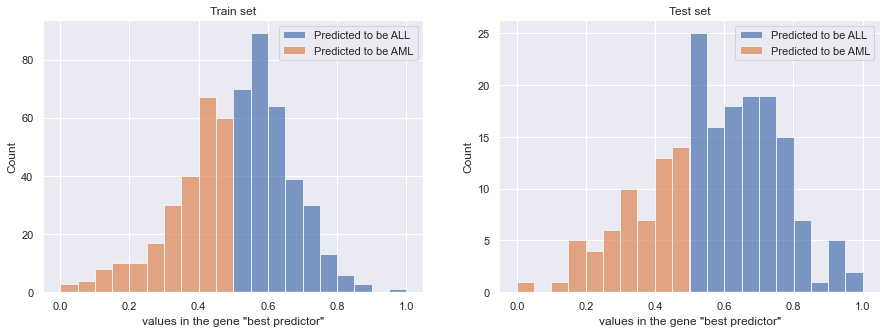

In [336]:
# plt.hist(X_trainNorm[best_predictor], alpha=0.7, label='Train set')
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].hist(best_pred_ALL, alpha=0.7, label='Predicted to be ALL', bins=10)
ax[0].hist(best_pred_AML, alpha=0.7, label='Predicted to be AML', bins=10)
ax[0].set_xlabel('values in the gene \"best predictor\"')
ax[0].set_ylabel('Count')
ax[0].set_title('Train set')
ax[0].legend()

ax[1].hist(best_pred_ALL_test, alpha=0.7, label='Predicted to be ALL', bins=10)
ax[1].hist(best_pred_AML_test, alpha=0.7, label='Predicted to be AML', bins=10)
ax[1].set_xlabel('values in the gene \"best predictor\"')
ax[1].set_ylabel('Count')
ax[1].set_title('Test set')
ax[1].legend()

plt.show()

In [337]:
# delete all this

#Plot two histograms of your best_predictor --
#one using the training set and another using the testing set.
#The histogram should clearly distinguish two different Cancer_type classes.

#we might want to plot the values instead, and first categorize them in which one are predicted to 1

# plt.hist(X_trainNorm[best_predictor], alpha=0.7, label='Train set')
# plt.hist(logit1.predict(X_trainNorm[best_predictor].values.reshape(-1,1)), alpha=0.7, label='Train set')
# plt.hist(logit1.predict(X_testNorm[best_predictor].values.reshape(-1,1)), alpha=0.7, label='Test set')
# plt.xlabel('prediction of ALL (0) or AML (1) from the gene \"best predictor\"')
# plt.ylabel('Count')
# plt.title('Comparison of distribution of predictions of gene in train and test set')
# plt.legend()
# plt.show()

In [48]:
# dette er feil, slett
dfType1 = dfNorm[dfNorm['Cancer_type']==1].drop(columns='Cancer_type')
dfType0 = dfNorm[dfNorm['Cancer_type']==0].drop(columns='Cancer_type')

print(np.max(dfType0.mean()))
print(np.min(dfType0.mean()))

print(np.max(dfType1.mean()))
print(np.min(dfType1.mean()))

print('The column with highest mean from set 1 is ',np.argmax(dfType1.mean()))
print('The column with highest mean from set 0 is ',np.argmax(dfType0.mean()))
print('The column with lowest mean from set 1 is ',np.argmin(dfType1.mean()))
print('The column with lowest mean from set 0 is ',np.argmin(dfType0.mean()))

0.718446785368679
0.2684675722196719
0.7114533099610166
0.26198710609369513
The column with highest mean from set 1 is  5455
The column with highest mean from set 0 is  1475
The column with lowest mean from set 1 is  661
The column with lowest mean from set 0 is  4078


1.0

**1.4 Using `best_predictor`, create a classification model by simply eye-balling a value for this gene that would discriminate the two classes the best (do not use an algorithm to determine for you the optimal coefficient or threshold; we are asking you to provide a rough estimate / model by manual inspection). Justify your choice in 1-2 sentences. Report the accuracy of your hand-chosen model on the test set.**


In [351]:
# fix
X_testNorm.loc[X_testNorm.index[116],best_predictor]
np.argmax(X_testNorm[best_predictor])

print('''
The highest value from best_predictor is observation number 116 which is 1 on the standardized scale.
''')



The highest value from best_predictor is observation number 116 which is 1 on the standardized scale.



*your answer here*

---

<div class='exercise'> <b> Question 2 [35pts]: Logistic Regression Modeling </b> </div>


**2.1** Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type.  Carefully interpret the coefficient estimates for this model.

*Remember, you need to set the regularization parameter for sklearn's logistic regression function to be a very large value in order to **not** regularize (use `C=100000` or `penalty = "none"`).

**2.2** Plot the logistic curves for the model in 2.1 ($y$-axis is probability scale, $x$-axis is `best_predictor`).  Interpret this plot: at what values of your `best_predictor` will you predict the patient to have ALL?  How does this compare to your eeballed value from 1.4?

**2.3** Calculate the training and test classification accuracies of this model in 2.1. How do these compare to the eye-balled model from 1.4?


**2.4** Next, fit a multiple logistic regression model with **all** the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values). How does the classification accuracy of this model compare with the models fitted with a single gene (on both the training and test sets)?  

**2.5** Print out and interpret the logistic regression coefficients for  `best_predictor` from both the simple logistic and multiple logistic regression models from the previous two parts.  Do they agree or disagree?  What does this indicate?

**2.6** Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set (choose between 20 reasonable values of $\lambda$). Report the classification accuracy on both the training and testing set.

**2.7** How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.4?


## Answers

**2.1 Fit a simple logistic regression model to the training set using the single gene predictor `best_predictor` to predict cancer type. Carefully interpret the coefficient estimates for this model.**

In [365]:
logit = LogisticRegression(penalty="none", fit_intercept=True)
logit_single = logit.fit(X_trainNorm[best_predictor].values.reshape(-1, 1), y_train)

print('The intercept for the single reg model is: ', logit_single.intercept_[0], '. This means that the log odds for type of cancer are ~1.27 when x=0, i.e. when this gene has its lowest value (since the values are normalizaed).')
print('The coefficiant for the single reg model is: ', logit_single.coef_[0][0], '. This means that the log odds for type of cancer decreases with ~2.59 when x goes from 0 to 1, i.e when this gene has the highest observed value rather than the lowest.')

The intercept for the single reg model is:  1.2684248229969208 . This means that the log odds for type of cancer are ~1.27 when x=0, i.e. when this gene has its lowest value (since the values are normalizaed).
The coefficiant for the single reg model is:  -2.5937379099642888 . This means that the log odds for type of cancer decreases with ~2.59 when x goes from 0 to 1, i.e when this gene has the highest observed value rather than the lowest.


*your answer here* 


**2.2 Plot the logistic curves for the model in 2.1 ($y$-axis is probability scale, $x$-axis is `best_predictor`).  Interpret this plot: at what values of your `best_predictor` will you predict the patient to have ALL?  How does this compare to your eeballed value from 1.4?**


In [507]:
# slett: X_dummy = np.linspace(np.min(X_testNorm[best_predictor]),np.max(X_testNorm[best_predictor]))
classification_boundary = -(logit_single.intercept_[0])/logit_single.coef_[0][0]

X_trainNorm_sorted = np.sort(X_trainNorm[best_predictor])
X_testNorm_sorted = np.sort(X_testNorm[best_predictor])
y_pred_single_train = logit_single.predict(X_trainNorm_sorted.reshape(-1, 1))
y_pred_single_test = logit_single.predict(X_testNorm_sorted.reshape(-1, 1))
y_predproba_single_train = logit_single.predict_proba(X_trainNorm_sorted.reshape(-1, 1))[:,0]
y_predproba_single_test = logit_single.predict_proba(X_testNorm_sorted.reshape(-1, 1))[:,0]

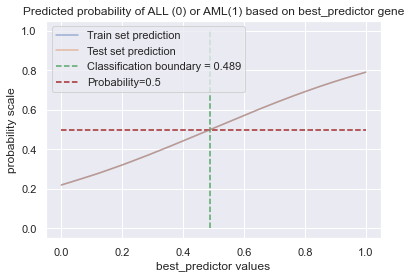

Since the classification boundary is 0.489, the model will predict patients to have ALL for all scored below this value, and AML for all scores above.


In [504]:
# Plot:

plt.plot(X_testNorm_sorted, y_predproba_single_test, label='Train set prediction', alpha=0.5)
plt.plot(X_trainNorm_sorted, y_predproba_single_train, label='Test set prediction', alpha=0.5)
plt.vlines(classification_boundary,ymin=np.min(X_testNorm_sorted),ymax=np.max(X_testNorm_sorted), linestyles='--', color='g', label='Classification boundary = {:.3f}'.format(classification_boundary))
plt.hlines(0.5,xmin=np.min(X_testNorm_sorted),xmax=np.max(X_testNorm_sorted), linestyles='--', color='brown',label='Probability=0.5')
plt.xlabel('best_predictor values')
plt.ylabel('probability scale')
plt.title('Predicted probability of ALL (0) or AML(1) based on best_predictor gene')
plt.legend()
plt.show()

print('Since the classification boundary is {:.3f}, the model will predict patients to have ALL for all scored below this value, and AML for all scores above.'.format(classification_boundary))

**2.3 Calculate the training and test classification accuracies of this model in 2.1.  How do these compare to the eye-balled model from 1.4?**

In [510]:
print('The accurracy for the train set it:', sk.metrics.r2_score(y_train ,  y_pred_single_train))
print('The accurracy for the test set it:', sk.metrics.r2_score(y_test ,  y_pred_single_test))
print(' They compare to the eye-balled model ......')  
        #fix

The accurracy for the train set it: -0.8238188109468385
The accurracy for the test set it: -0.8731884057971013
 They compare to the eye-balled model ......


*your answer here* 


**2.4 Next, fit a multiple logistic regression model with *all* the gene predictors from the data set (reminder: for this assignment, we are always using the normalized values). How does the classification accuracy of this model compare with the models fitted with a single gene (on both the training and test sets)?**


In [491]:
logit = LogisticRegression(penalty="none", fit_intercept=True)
logit_multiple = logit.fit(X_trainNorm.values.reshape(-1, 7129), y_train)
y_pred_multiple_train = logit_multiple.predict(X_trainNorm)
y_pred_multiple_test = logit_multiple.predict(X_testNorm) 

    
print('The accurracy for the train set it:', sk.metrics.r2_score(y_train, y_pred_multiple_train))
print('The accurracy for the test set it:', sk.metrics.r2_score(y_test ,  y_pred_multiple_test))

The accurracy for the train set it: 1.0
The accurracy for the test set it: 0.10597826086956519


##### Answer 2.4:
As we would expect we get an R-squared for our train-set when we have more predictors than observations. This is clearly overfit, and we get a much lower R-squared on the test set. However this is a better model than our simple regression model on "best predictor".

**2.5 Print out and interpret the logistic regression coefficients for `best_predictor` from both the simple logistic and multiple logistic regression models from the previous two parts.  Do they agree or disagree?  What does this indicate?**

In [547]:
# print(logit_multiple.coef_[0])
print('The coefficients for the multiple regression model is:\n', logit_multiple.coef_[0], '.\nEach of these betas define how much the probability of type of cancer changes when the associated x is increased from 0 to 1, holding all other factors constant.')

print('\nThe intercept for the multiple regression model is:', logit_multiple.intercept_[0], '.\nThis defines the log odds for type of cancer when x=0, i.e. when this gene has its lowest value (since the values are normalizaed).')

print('\nThe coefficient for the single reg model is: ', logit_single.coef_[0][0], ' and is individually interpreted in task 2.1.') 
print('\nThe intercept for the single reg model is: ', logit_single.intercept_[0],  ' and is individually interpreted in task 2.1.') 

The coefficients for the multiple regression model is:
 [ 3.65104993  1.69644023 -1.32174481 ... -0.53882007  4.14380294
  1.08813499] .
Each of these betas define how much the probability of type of cancer changes when the associated x is increased from 0 to 1, holding all other factors constant.

The intercept for the multiple regression model is: -0.12937187791625676 .
This defines the log odds for type of cancer when x=0, i.e. when this gene has its lowest value (since the values are normalizaed).

The coefficient for the single reg model is:  -2.5937379099642888  and is individually interpreted in task 2.1.

The intercept for the single reg model is:  1.2684248229969208  and is individually interpreted in task 2.1.


**2.6 Now let's use regularization to improve the predictions from the multiple logistic regression model. Specifically, use LASSO-like regularization and 5-fold cross-validation to fit the model on the training set (choose between 20 reasonable values of $\lambda$). Report the classification accuracy on both the training and testing set.**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lambdas = np.logspace(-3,8,20)


def cv_optimize_Lasso(x: np.ndarray, y: np.ndarray, list_of_lambdas: list, n_folds: int = 5):
    parameters = {'alpha': list_of_lambdas}
    # the scoring parameter below is the default one in ridge, but you can use a different one in the cross-validation phase if you want.
    gs = GridSearchCV(Lasso(), param_grid=parameters, cv=n_folds, scoring="r2")
    gs.fit(x, y)
    return gs

lasso_train = cv_optimize_Lasso(X_trainNorm, y_train, lambdas)
lasso_test = cv_optimize_Lasso(X_testNorm, y_test, lambdas)

print('Best training set Score: ', lasso_train.best_score_)
print('Best training set Params: ', lasso_train.best_params_)
print('Best test set Score: ', lasso_test.best_score_)
print('Best test set Params: ', lasso_test.best_params_)

**2.7 How many predictors are considered as important features in this regularized model?  What does that say about the full logistic regression model in problem 2.4?**


*your answer here*

---

<div class='exercise'> <b> Question 3 [10pts]: $k$-NN Classification </b> </div>

**3.1** Use 5-fold cross-validation to select $k$ for a $k$-NN classification model based on the full predictor set.  Choose between `ks = [1,3,5,7,10,15,20,50,100]`. 

**3.2** Provide the confusion matrix for 3 models: (i) the full multiple logistic regression model from 2.4, (ii) the best regularized model from 2.6, and (iii) the best $k$-NN from the previous part. Report the false positive and false negative rates (all in the test set).  Briefly interpret what you notice.


### Answers

**3.1 Use 5-fold cross-validation to select $k$ for a $k$-NN classification model based on the full predictor set.  Choose between `ks = [1,3,5,7,10,15,20,50,100]`.  Report your chosen $k$, and report the misclassification rate on both the train and test sets for the model using your chosen $k$.**

In [3]:
######
# your code here
######

**3.2 Provide the confusion matrix for 3 models: (i) the full multiple logistic regression model from 2.4, (ii) the best regularized model from 2.6, and (iii) the best $k$-NN from the previous part. what are the  false positive and false negative rates in these 3 models (all in the test set)?  Briefly interpret what you notice.**

In [4]:
######
# your code here
######

*your answer here*

---

#### <div class='exercise'><b> Question 4 [15 pts]: Performing Principal Components Analysis </b></div>

**4.1** Create the full PCA decomposition of `X_train` and apply the transformation to both `X_train` and `X_test`.  Report the shape of both of these.  What is the limiting factor for the maximum number of PCA components for this data set? 

*Hint: be sure to standardize before performing PCA.

**4.2** PCA is often solely used to help in visualizing high-dimensional problems.  Plot the scatterplot of the second PCA vector of train on the $Y$-axis and the first PCA vector of train on the $X$-axis (be sure to denote the classes via different colors and markings).  In 2-3 sentences, explain why using the scatterplot of the top 2 PCA vectors is a useful approach to visualize a high dimensional classification problem.

**4.3** Determine and report the variance explained in `X_train` based on the top 2 PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).  Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony. 



### Answers

**4.1 Create the full PCA decomposition of X_train and apply the transformation to both X_train and X_test. Report the shape of both of these. What is the limiting factor for the maximum number of PCA components for this data set?**

In [ ]:
######
# your code here
######

*Your answer here*


**4.2 PCA is often solely used to help in visualizing high-dimensional problems. Plot the scatterplot of the second PCA vector on the  𝑌 -axis and the first PCA vector on the  𝑋 -axis (be sure to denote the classes via different color/markings). In 2-3 sentences, explain why using the scatterplot of the top 2 PCA vectors is a useful approach to visualize a high dimensional classification problem.**

In [ ]:
######
# your code here
######

*your answer here*


**4.3 Determine and report the variance explained in `X_train` based on the top 2 PCA vectors.  Determine and report how many PCA vectors are needed so that 90\% of the variability in the predictors is explained, and create a plot to illustrate this result (Hint: look at cumulative explained variability vs. number of PCA components used).  Select a reasonable value for the number of components that balances representativeness (of the predictors) with parsimony.**

In [ ]:
######
# your code here
######

*your answer here*

---

<div class='exercise'><b> Question 5 [10 pts]: Principal Components Regression (PCR) </b></div>

**5.1** Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first 2 PCA vectors, (2) with the number of component vectors you chose from 5.4 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with these models?

**5.2** Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well. For the best performing model according to cross-validation, interpret what the model says about the relationship between `best_predictor` and `Cancer_type`.



### Answers

**5.1 Fit three separate Logistic Regression models using principal components as the predictors: (1) with just the first 2 PCA vectors, (2) with the number of component vectors you chose from 5.4 above, and (3) with the number of components that explain at least 90% of the variability in the predictor set. How do the classification accuracy values on both the training and test sets compare with these models?**

In [ ]:
######
# your code here
######


*your answer here*


**5.2 Use cross-validation to determine the best number of principal components. Try out the 3 values from the previous sub-part and optionally include other values as well. For the best performing model according to cross-validation, interpret what the model says about the relationship between your `best_predictor` and `Cancer_type`**.

In [ ]:
######
# your code here
######


* your answer here*

<div class='exercise'><b> Question 6 [15 pts]: Evaluating Classifiers </b></div>

**6.1**: Another way to evaluate models in a classification setting is through an Area-under-the-ROC-Curve (AUC). Briefly explain what the AUC and the ROC are trying to do and how this approach differs from evaluating models based on misclassification rate (as you have done thus far in this problem set).

**6.2** Evaluate the 'best' models (best based on test misclassification: if there is a tie, choose the 'simplest' model) from each class of classification models using AUC.  That is calculate AUC for the following models:
- the best logistic regression model, whether regularized or not (question 2)
- the best $k$-NN model (question 3)
- the best PCR model (question 5)

For the model with the best AUC, plot the ROC. Briefly interpret your plot.

**6.3** Based on AUC, is there one clear stand-out winner or are a lot of models similar in prediction?  If you were to predict real cancer patients, how would use these models to predict cancer type?

*See extra information about ALL and AML at the bottom of this notebook.*

### Answers

**6.1 Another way to evaluate models in a classification setting is through an Area-under-the-ROC-Curve (AUC). Briefly explain what the AUC and the ROC are trying to do and how this approach differs from evaluating models based on misclassification rate (as you have done thus far in this problem set).**

*your answer here*


**6.2 use AUC to evaluate the 'best' models (best based on test misclassification: if there is a tie, choose the 'simplest' model) from each class of classification models.  That is calculate AUC for the following models:**
- the best logistic regression model, whether regularized or not (question 2)
- the best $k$-NN model (question 3)
- the best PCR model (question 5)

**For the model with the best AUC, plot the ROC. Briefly interpret your plot.**



In [ ]:
######
# your code here
######


*your answer here*

**6.3 Based on AUC, is there one clear stand-out winner or are a lot of models similar in prediction?  If you were to predict real cancer patients, how would use these models to predict cancer type?**

*your answer here*


<hr style="height:2pt">


**Additional Information**

Acute Lymphoblastic Leukemia (ALL):
- About 98% of children with ALL go into remission within weeks after starting treatment.
- About 90% of those children can be cured. Patients are considered cured after 10 years in remission.

Acute Myeloid Leukemia (AML):
- In general, children with AML are seen as lower risk than adults. 
- Around 85 to 90 percent of children with AML will go into remission after induction, according to the American Cancer Society. AML will return in some cases.  
- The five-year-survival-rate for children with AML is 60 to 70 percent.

<hr style="height:2pt">